## Bayesian Statistics

<img src="https://www.changechecker.org/wp-content/uploads/2018/12/Base-Proof-set-1024x205.png" alt="fair vs fake coin prob densities">

From the datacamp course foundations of probability in R.

Bayesian statistics is a mathematically rigorous method for updating your beliefs based on evidence. In this chapter, you'll learn to apply Bayes' theorem to draw conclusions about whether a coin is fair or biased, and back it up with simulations.

Updating

Suppose you have a coin that is equally likely to be fair (50% heads) or biased (75% heads). You then flip the coin 20 times and see 11 heads.

Without doing any math, which do you now think is more likely- that the coin is fair, or that the coin is biased?

**Updating with simulation**

We see 11 out of 20 flips from a coin that is either fair (50% chance of heads) or biased (75% chance of heads). How likely is it that the coin is fair? Answer this by simulating 50,000 fair coins and 50,000 biased coins.

In [1]:
# Simulate 50000 cases of flipping 20 coins from fair and from biased
fair <- rbinom(50000, 20, .5)
biased <- rbinom(50000, 20, .75)

[1] 0.8529475

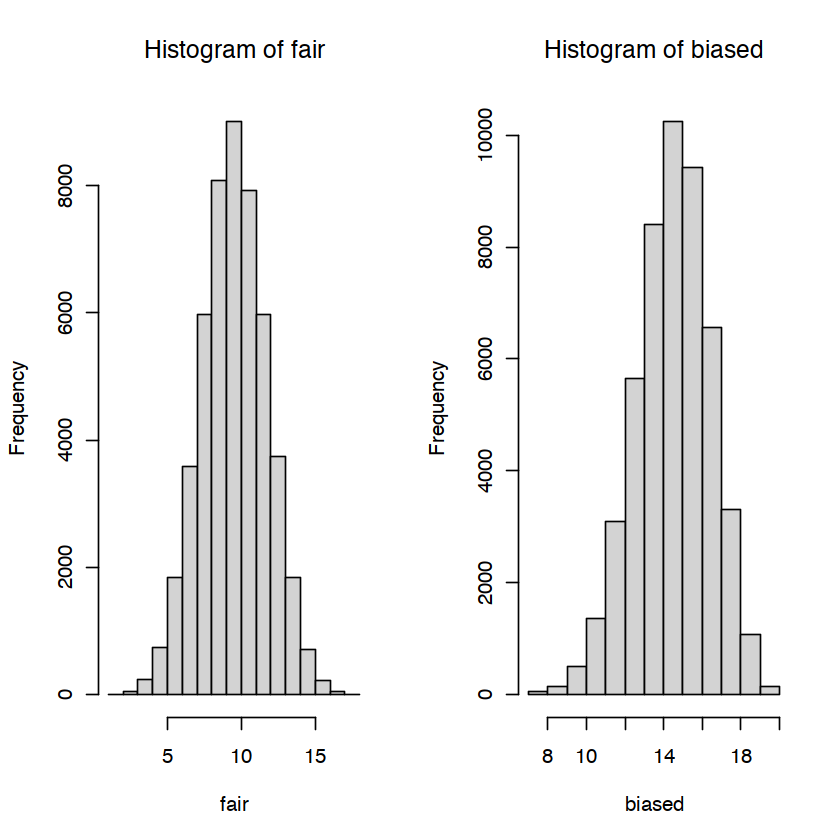

In [3]:
par(mfrow=c(1,2))
hist(fair)
hist(biased)#I would like to highlight a bin of my choice

In [26]:
#a function that does the job
highlight <- function(x, value, col.value, col=NA, ...){
   hst <- hist(x, ...)
   idx <- findInterval(value, hst$breaks)
   cols <- rep(col, length(hst$counts))
   cols[idx] <- col.value
   hist(x, col=cols, ...)
}

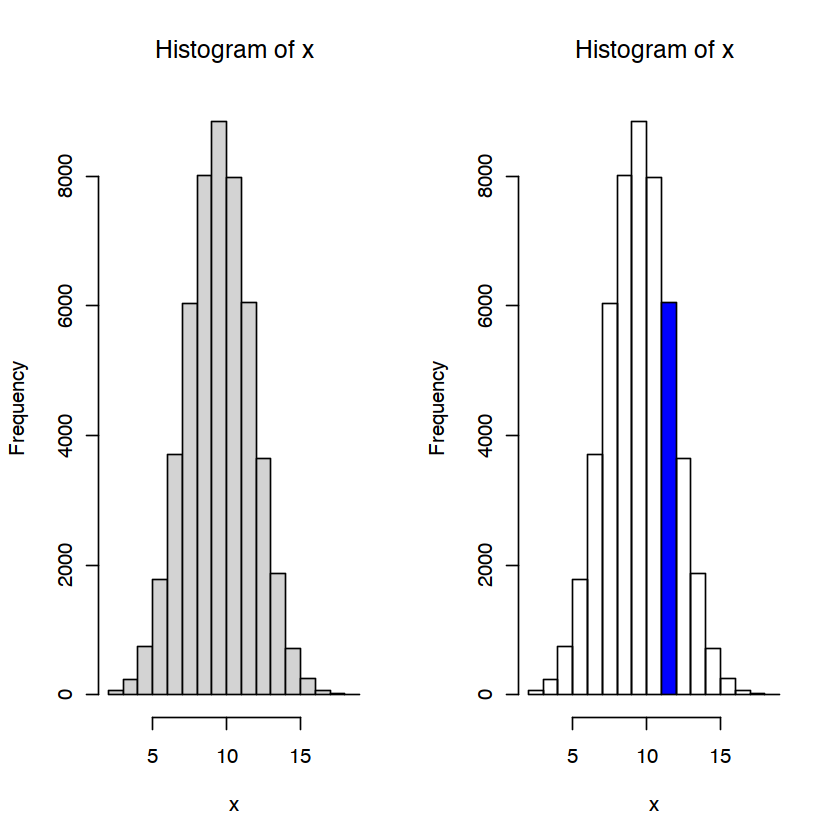

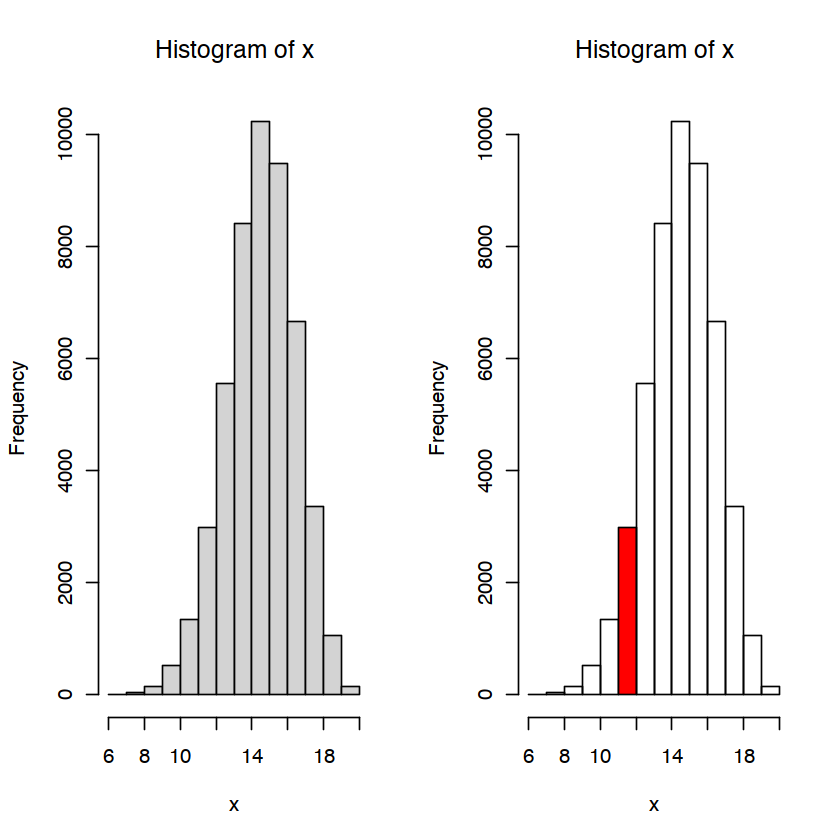

In [28]:
par(mfrow=c(1,2))
highlight(fair, 11, "blue")
highlight(biased, 11, "red")

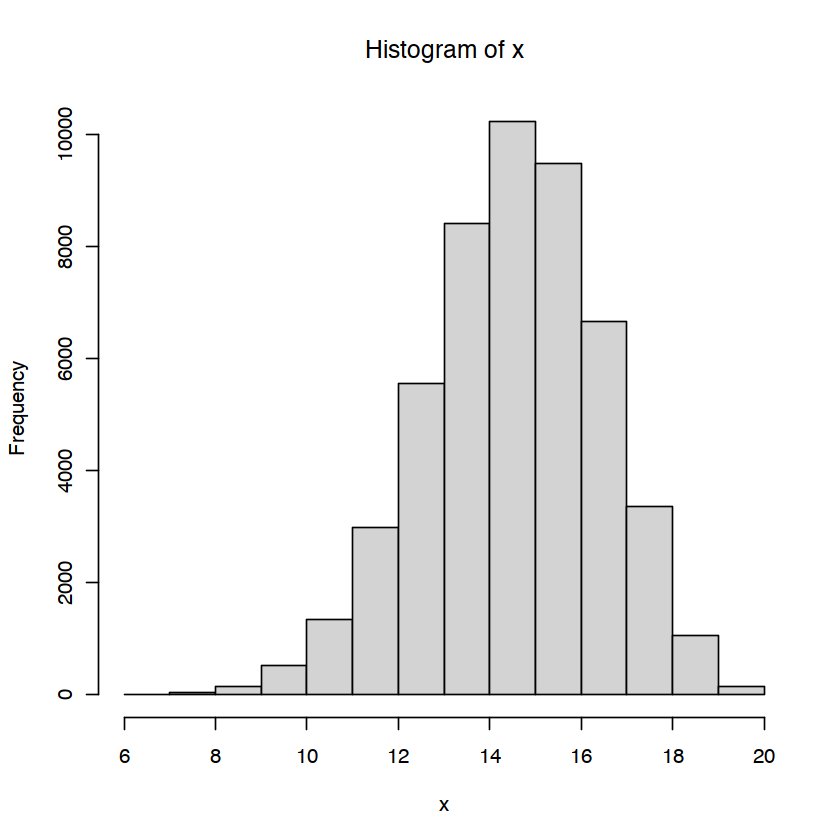

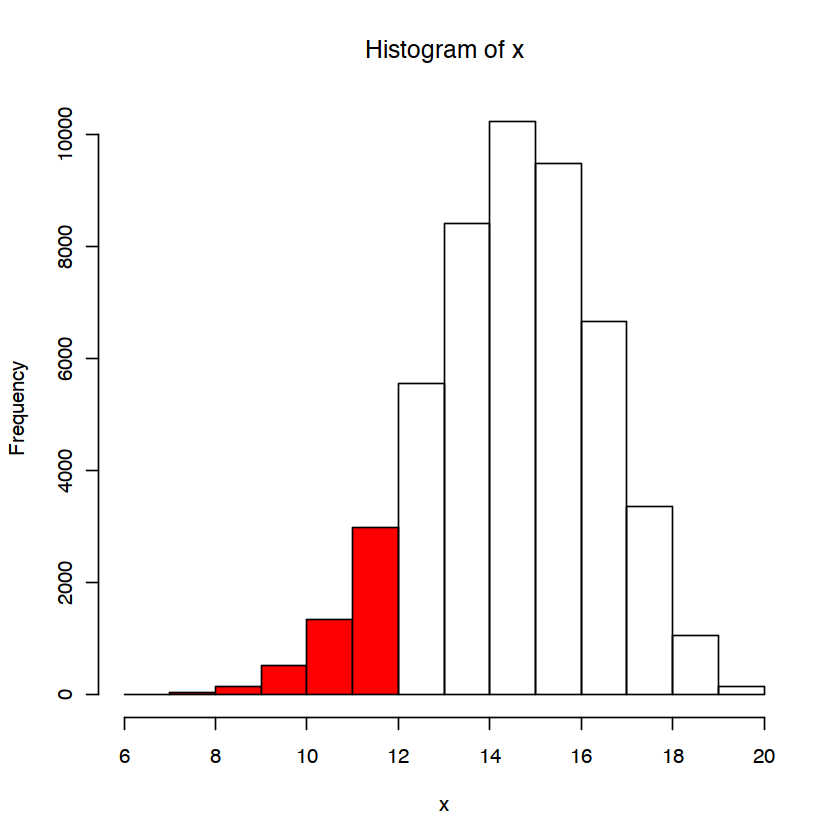

In [29]:
highlight(biased, c(11:6), "red")
#https://stackoverflow.com/questions/2127926/how-do-i-highlight-an-observations-bin-in-a-histogram-in-r

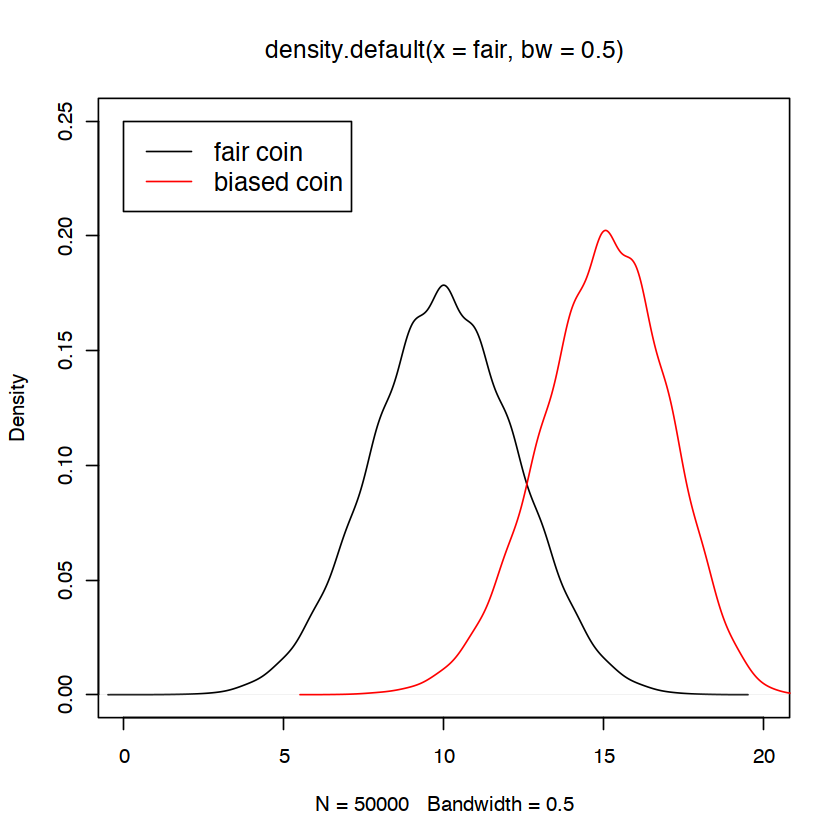

In [23]:
plot(density(fair,bw=0.5),ylim=c(0,.25),xlim=c(0,20))
lines(density(biased,bw=0.5),col="red")
legend(0,0.25, legend=c("fair coin", "biased coin"),
       col=c("black", "red"),lty=c(1,1),cex=1.25)

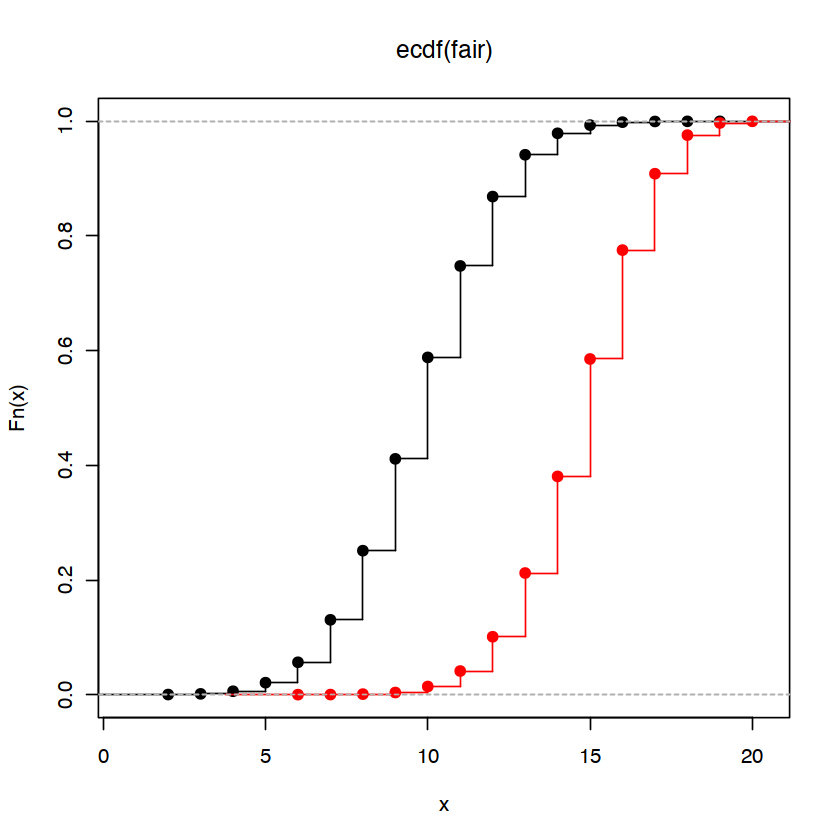

In [45]:
plot(ecdf(fair),verticals = T)
plot(ecdf(biased),add=T,col="red",verticals=T)
#so here you can see the dif, the probability of getting 11 or less for a fair point is close to 0.8
#whereas it is around 10% of a fake coin

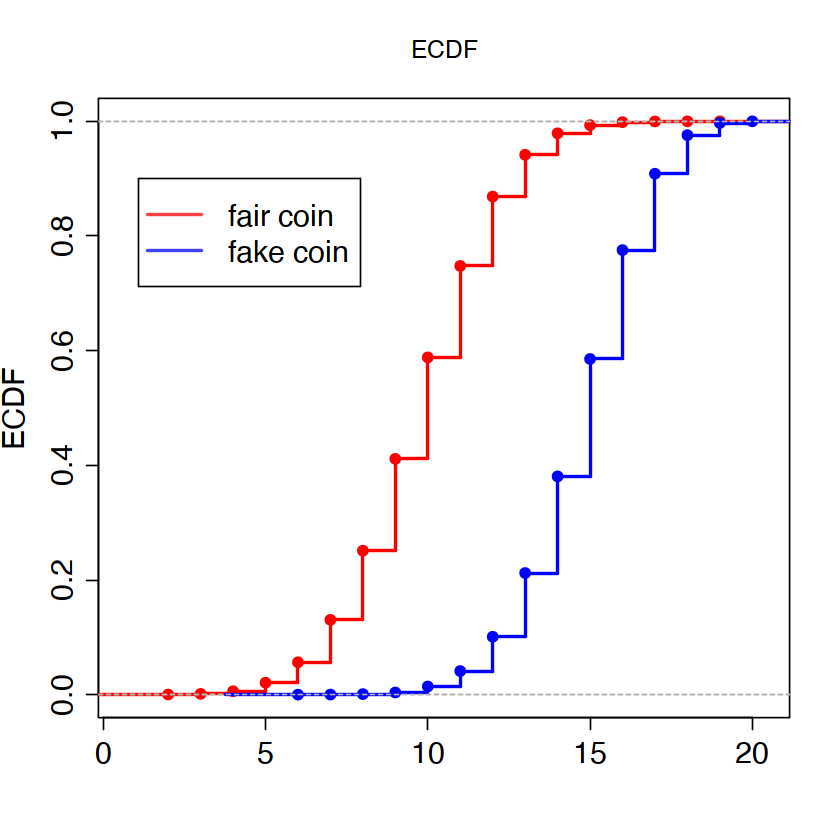

In [44]:
# Empirical CDF
plot(ecdf(fair), verticals = T,col="red", xlab ="", ylab = "ECDF", cex.axis =1.5, cex.lab = 1.5, main = "ECDF",lwd=2)
lines(ecdf(biased), verticals=T,col="blue", cex.axis =1.5, cex.lab = 1.5, main = "ECDF",lwd=2)
legend(1.1, 0.9, c("fair coin","fake coin"), col=c(rgb(1,0,0,0.75),rgb(0,0,1,0.75)),
       text.col = "black", lty = c(1, 1), lwd = c(2,2),
       merge = TRUE, bg = "white",cex=1.5)

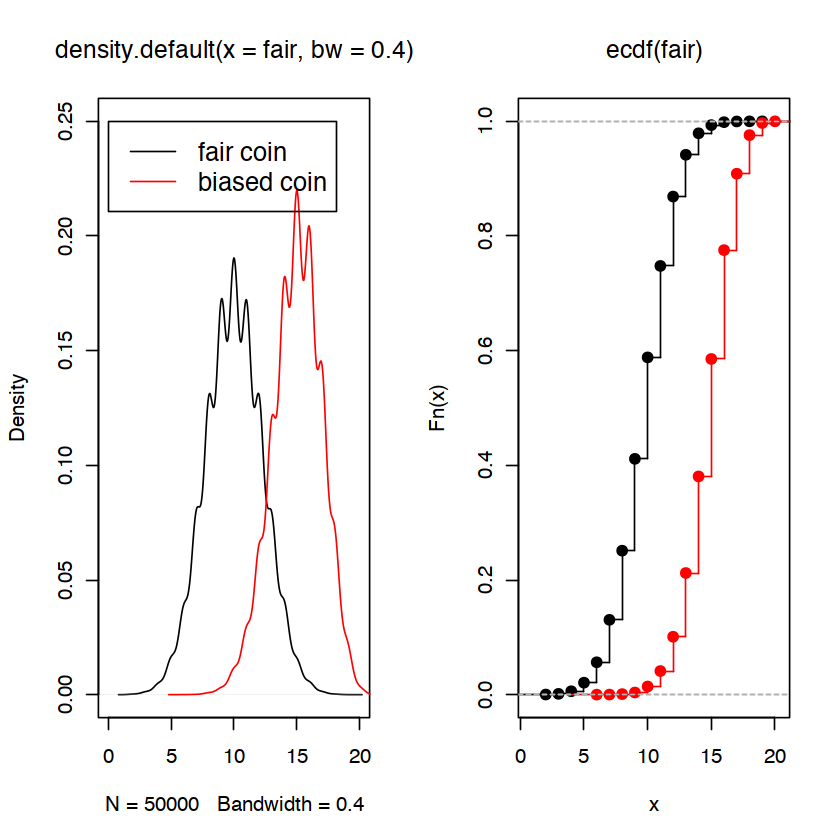

In [47]:
par(mfrow=c(1,2))
plot(density(fair,bw=0.4),ylim=c(0,.25),xlim=c(0,20))
lines(density(biased,bw=0.4),col="red")
legend(0,0.25, legend=c("fair coin", "biased coin"),
       col=c("black", "red"),lty=c(1,1),cex=1.25)
plot(ecdf(fair),verticals = T)
plot(ecdf(biased),add=T,col="red",verticals=T)
#so here you can see the dif, the probability of getting 11 or less for a fair point is close to 0.8
#whereas it is around 10% of a fake coin

In [ ]:
# How many fair cases, and how many biased, led to exactly 11 heads?
(fair_11 <- sum(fair == 11))
(biased_11 <- sum(biased == 11))

# Find the fraction of fair coins that are 11 out of all coins that were 11
fair_11 / (fair_11 + biased_11)

Is 0.8 the probability of having a fair coin based on the output of heads?

**Updating after 16 heads**

Suppose that when you flip a different coin (that could either be fair or biased) 20 times, you see 16 heads.

Without doing any math, which do you now think is more likely- that this coin is fair, or that it's biased?

Updating with simulation after 16 heads

We see 16 out of 20 flips from a coin that is either fair (50% chance of heads) or biased (75% chance of heads). How likely is it that the coin is fair?

Instructions
100 XP
Simulate 50,000 cases of flipping 20 coins from a fair coin (50% chance of heads), as well as from a biased coin (75% chance of heads). Save these variables as fair and biased respectively.
Find the number of fair coins where exactly 16/20 came up heads, then the number of biased coins where exactly 16/20 came up heads. Save them as fair_16 and biased_16 respectively.
Print the fraction of all coins that came up heads 16 times that were fair coins- this is the posterior probability that a coin with 16/20 is fair.

In [24]:
#Simulate 50000 cases of flipping 20 coins from fair and from biased
fair <- rbinom(50000,20,.5)
biased <- rbinom(50000,20,.75)

# How many fair cases, and how many biased, led to exactly 16 heads?
fair_16 <- sum(fair==16)
biased_16 <- sum(biased==16)

# Find the fraction of fair coins that are 16 out of all coins that were 16
print(fair_16/(biased_16+fair_16))

[1] 0.02625372


1. Prior probability
In these exercises we've been determining whether a coin we got from Nick is fair or biased. We've treated it as if before we saw any flips, there's a 50% chance that the coin is fair, and a 50% chance that the coin is biased towards heads. But let's say I generally trust Nick. When he gave me this coin, I figured he probably wasn't trying to trick me. I'm just testing the coin to be completely safe. Let's say that when Nick gives me the coin, I think there's only 10% chance that it's biased, and a 90% chance that it's fair. This is called a prior probability, and it's an important part of Bayesian statistics.

2. Differently sized piles
Let's go back to the two piles of coins from the last lesson: one of the piles is fair, one of them biased, and we flip each one of them 20 times. We know that Nick got his coin from one of these two piles. And by comparing the sizes of the red bars- the cases where a coin resulted in exactly 14 heads- we were able to find a conditional probability. However, this time, instead of having two equally sized piles, let's start with 90,000 coins in the fair pile and only 10,000 biased coins in the other pile. This represents our prior probability, giving the fair coins an advantage. Notice that in the resulting histograms, the relative height of the red bars- those with 14 heads- has changed. In fact, even though each of the fair coins individually was less likely to result in 14 heads than a biased coin was, there were more fair coins that ended up with 14 than biased ones.

3. Simulating with differently sized piles
We can simulate these piles to find the probability that a coin with 14 heads is biased, given our prior probability of 10%. We first simulate 90,000 draws from the binomial where the coins are fair: notice that we changed the first argument, the number of draws, to 90,000. We see that three thousand, four hundred and ten of these draws resulted in 14 heads. We then simulate only 10,000 draws of biased coins, each with a 75% chance of heads. We see that one thousand seven hundred and six of them led to 14 heads. Now we can find our conditional probability. Given that we are using one of those coins that resulted in 14 heads, what fraction of those were biased? We find that it's about 33%. We originally thought there was a 10% chance the coin was biased, but after seeing 14 heads out of 20 flips, our probability has updated to 33%. This simulation approach works even if there are more than two possibilities for the probability of heads. For example, you could start with three piles of coins, one that has a 25% chance, one that has a 50% chance, and one that has a 75% chance. You'll try an example like that in the exercises.

4. Let's practice!

Updating with priors

We see 14 out of 20 flips are heads, and start with a 80% chance the coin is fair and a 20% chance it is biased to 75%.

You'll solve this case with simulation, by starting with a "bucket" of 10,000 coins, where 8,000 are fair and 2,000 are biased, and flipping each of them 20 times.

Instructions
100 XP
Instructions
100 XP
Simulate 8,000 trials of flipping a fair coin 20 times and 2,000 trials of flipping a biased coin 20 times. Save them as fair_flips and biased_flips, respectively.
Find the number of cases that resulted in 14 heads from each coin, saving them as fair_14 and biased_14 respectively.
Find the fraction of all coins that resulted in 14 heads that were fair: this is an estimate of the posterior probability that the coin is fair.

In [30]:
# Simulate 8000 cases of flipping a fair coin, and 2000 of a biased coin
fair_flips <- rbinom(8000, 20, .5)
biased_flips <- rbinom(2000, 20, .75)

# Find the number of cases from each coin that resulted in 14/20
fair_14 <- sum(fair_flips == 14)
biased_14 <- sum(biased_flips == 14)

# Use these to estimate the posterior probability
fair_14 / (fair_14 + biased_14)

[1] 0.4786585

Updating with three coins

Suppose instead of a coin being either fair or biased, there are three possibilities: that the coin is fair (50% heads), low (25% heads), and high (75% heads). There is a 80% chance it is fair, a 10% chance it is biased low, and a 10% chance it is biased high.

You see 14/20 flips are heads. What is the probability that the coin is fair?

Instructions
0 XP
Instructions
0 XP
Use the rbinom() function to simulate 80,000 draws from the fair coin, 10,000 draws from the high coin, and 10,000 draws from the low coin, with each draw containing 20 flips. Save them as flips_fair, flips_high, and flips_low, respectively.
For each of these types, compute the number of coins that resulted in 14. Save them as fair_14, high_14, and low_14, respectively.
Find the posterior probability that the coin was fair, by dividing the number of fair coins resulting in 14 from the total number of coins resulting in 14.

Hint

The numerator of the posterior probability that the coin is fair should be fair_14, divided by fair_14 + low_14 + high_14.

In [31]:
# Simulate 80,000 draws from fair coin, 10,000 from each of high and low coins
flips_fair <- rbinom(80000, 20, .5)
flips_high <- rbinom(10000, 20, .75)
flips_low <- rbinom(10000, 20, .25)

# Compute the number of coins that resulted in 14 heads from each of these piles
fair_14 <- sum(flips_fair == 14)
high_14 <- sum(flips_high == 14)
low_14 <- sum(flips_low == 14)

# Compute the posterior probability that the coin was fair
fair_14 / (fair_14 + low_14 + high_14)

[1] 0.6396495

. Bayes' theorem
Throughout this chapter, we've used simulation to estimate a conditional probability that a coin is fair or biased.

2. Probabilities
For example, we looked at a distribution of 90,000 fair coins and 10,000 biased coins, and saw how many coins from each pile resulted in 14 heads. We saw about three thousand resulting in 14 heads among the fair coins, and about fifteen hundred among the biased coins. But what we're really working with in these simulations is probability densities. Consider this histogram in terms of the probability a coin out of the one hundred thousand we're flipping ends up with that outcome. In this lesson, rather than simulating many coins to determine whether a coin is biased, we'll use probability density- specifically the dbinom function- to find an exact answer. In the process, we'll introduce one of the most important equations in probability: Bayes' Theorem.

3. Probability of fair coin with 14 heads
Recall that we used simulation to find the number of fair coins resulting in 14, out of the 90 thousand in the original pile. Now, rather than simulating it with rbinom, let's find the exact probability of 14 heads with the dbinom function. But notice we also multiply it with the prior probability that the coin is fair, .9. That's the equivalent of the "90,000" in the rbinom line: it calculates the probability the coin is both fair and resulted in 14 heads. We also simulated 10,000 biased coins and found the number of times there were 14 heads out of 20 flips. We could replace that with dbinom using a .75 probability, and multiplying it by the .1 prior probability that a coin was biased. These get the exact probabilities shown in red in the histograms.

4. Conditional probability
Now that we have those probabilities, we can combine them the same way we did the coins. To find the probability a coin is biased conditional on it resulting in 14 heads out of 20, we look at the probability it is both 14 heads and biased out of the total probability that it resulted in 14 heads. This is the equivalent of looking at "both of the red bars", and asking which red bar the coin is in. As we did in the last slide, we can compute each of those probabilities by multiplying the probability density by the prior probability. In the numerator we're multiplying the probability a biased coin would give 14 heads, by the prior probability the coin is biased. You're now able to calculate this in R, by using dbinom to calculate each of the densities, multiplying each by the prior probabilities, and then putting them into a fraction. You'll be able to try this in the exercises.

5. Bayes' Theorem
This exact solution is an application of Bayes' Theorem. Bayes' Theorem is usually written in terms of finding the probability of event A given event B when you knew the probability of event B given event A. In this problem we explored in this chapter, event A is that the coin is biased, and event B is that it resulted in 14 heads out of 20. This is why Bayes Theorem was useful: we knew the probability of getting 14 heads given that the coin is biased, but we needed to convert it to the probability that a coin is biased given that it resulted in 14 heads. We could have just started the chapter with this equation, but our simulation showed what the numerator and denominator really represent, by imagining what fraction of all coins resulting in 14 heads were biased. This will help you understand and apply the theorem to calculate conditional probabilities in the future.

6. Let's practice!

Updating with Bayes theorem

In this chapter, you used simulation to estimate the posterior probability that a coin that resulted in 11 heads out of 20 is fair. Now you'll calculate it again, this time using the exact probabilities from dbinom(). There is a 50% chance the coin is fair and a 50% chance the coin is biased.

Instructions
100 XP
Instructions
100 XP
Use the dbinom() function to calculate the exact probability of getting 11 heads out of 20 flips with a fair coin (50% chance of heads) and with a biased coin (75% chance of heads). Save them as probability_fair and probability_biased, respectively.
Use these to calculate the posterior probability that the coin is fair. This is the probability that you would get 11 from a fair coin, divided by the sum of the two probabilities. 

In [32]:
#Use dbinom to calculate the probability of 11/20 heads with fair or biased coin
probability_fair <-dbinom(11,20,.5)
probability_biased <-dbinom(11,20,.75)

# Calculate the posterior probability that the coin is fair
probability_fair/(probability_fair+probability_biased)

[1] 0.8554755

Updating for other outcomes

In the last exercise, you solved for the probability that the coin is fair if it results in 11 heads out of 20 flips, assuming that beforehand there was an equal chance of it being a fair coin or a biased coin. Recall that the code looked something like:

probability_fair <- dbinom(11, 20, .5)
probability_biased <- dbinom(11, 20, .75)
probability_fair / (probability_fair + probability_biased)
Now you'll find, using the dbinom() approach, the posterior probability if there were two other outcomes.

Instructions
0 XP
Find the probability that a coin resulting in 14 heads out of 20 flips is fair.
Find the probability that a coin resulting in 18 heads out of 20 flips is fair.

Hint

Use an expression like the the last line of code from the previous exercise, but replace probability_fair and probability_biased with the right dbinom() calls.

In [33]:
# Find the probability that a coin resulting in 14/20 is fair
dbinom(14, 20, .5) / (dbinom(14, 20, .5) + dbinom(14, 20, .75))

# Find the probability that a coin resulting in 18/20 is fair
dbinom(18, 20, .5) / (dbinom(18, 20, .5) + dbinom(18, 20, .75))

[1] 0.179811

[1] 0.002699252

More updating with priors

Suppose we see 16 heads out of 20 flips, which would normally be strong evidence that the coin is biased. However, suppose we had set a prior probability of a 99% chance that the coin is fair (50% chance of heads), and only a 1% chance that the coin is biased (75% chance of heads).

You'll solve this exercise by finding the exact answer with dbinom() and Bayes' theorem. Recall that Bayes' theorem looks like:


![alt text here](formula bayes.png)

Use dbinom() to calculate the probabilities that a fair coin and a biased coin would result in 16 heads out of 20 flips.
Use Bayes' theorem to find the posterior probability that the coin is fair, given that there is a 99% prior probability that the coin is fair.

Hint

Remember to include the prior in the fraction. For example, since there is a 99% prior probability the coin is fair, the numerator would be probability_16_fair * .99.



In [34]:
# Use dbinom to find the probability of 16/20 from a fair or biased coin
probability_16_fair <- dbinom(16, 20, .5)
probability_16_biased <- dbinom(16, 20, .75)

# Use Bayes' theorem to find the posterior probability that the coin is fair
(probability_16_fair * .99) / (probability_16_fair * .99 + probability_16_biased * .01)

[1] 0.7068775

# Statistical rethinking, the grid method

<img src="earth balloon.png" alt="fair vs fake coin prob densities">

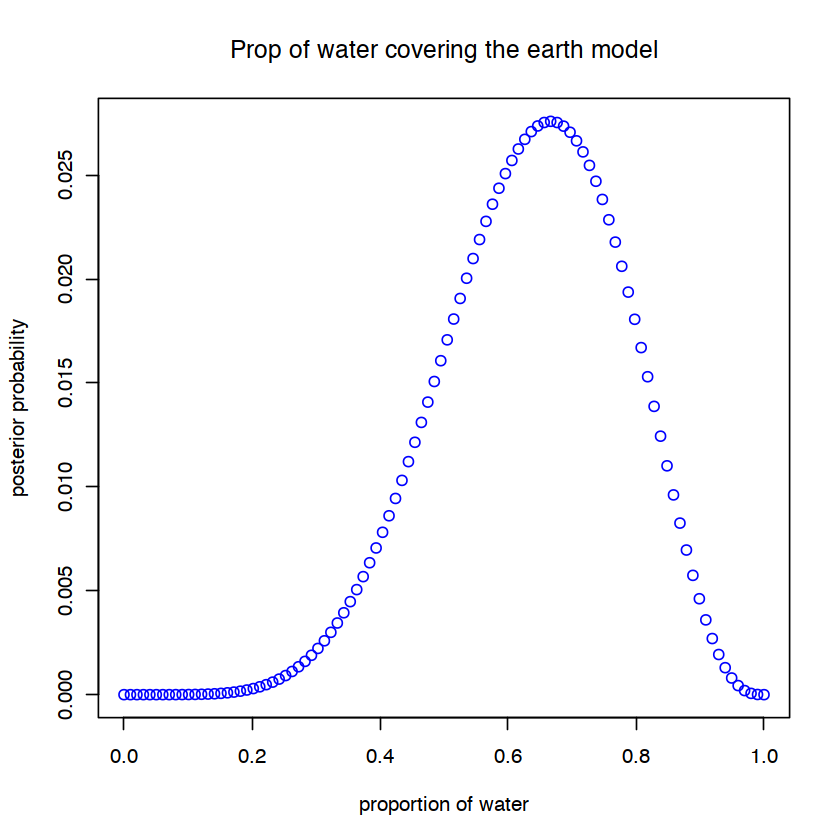

In [48]:
p.grid<-seq(0,1,length.out=100)#define grid of probabilities
prior<-rep(1,100)
likelihood<-dbinom(6,9, prob=p.grid)#for each probability calculate the likelihood
#of getting 6 water out of 9 earth tosses
#compute product of likelihood and prior
unst.posterior<-prior*likelihood#which is the same in this case
#std posterior
std.post<-unst.posterior/sum(unst.posterior)
plot(p.grid,std.post,type = "p",col="blue",
     xlab = "proportion of water",
     ylab="posterior probability",main="Prop. of water covering the earth model")

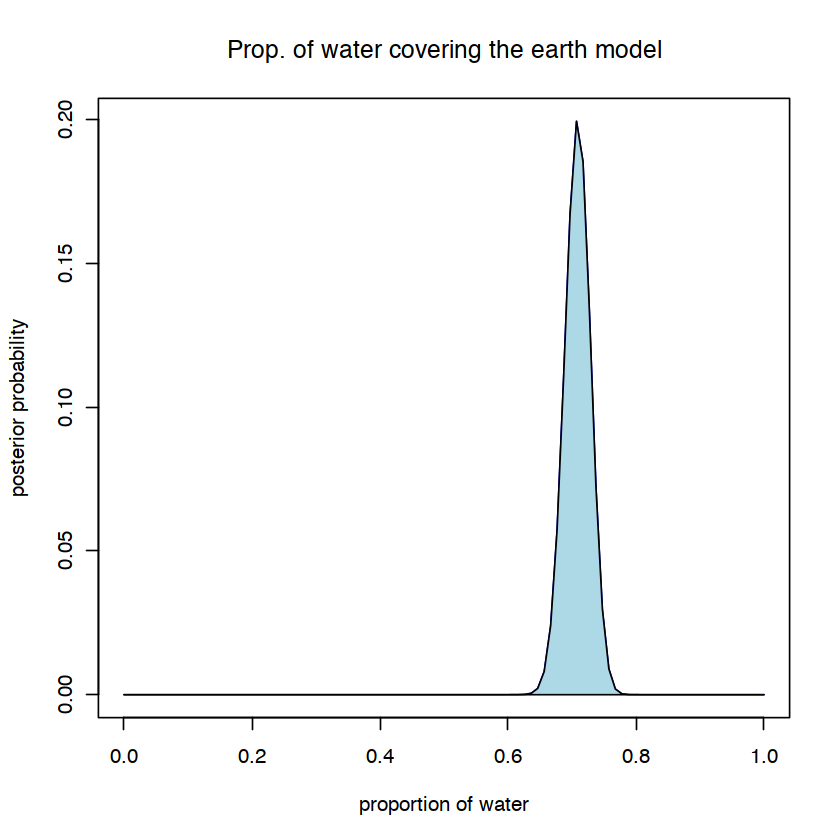

In [53]:
#let's update it to the actual proportion: 71% of water covers earth
prior<-std.post#previous posterior is now the prior
likelihood<-dbinom(71,100, prob=p.grid)#new accurate info
unst.posterior<-prior*likelihood
std.post<-unst.posterior/sum(unst.posterior)
plot(p.grid,std.post,type = "l",col="blue",
     xlab = "proportion of water",
     ylab="updated posterior probability",main="Prop. of water covering the earth model")
polygon(p.grid,std.post,col="light blue")